In [95]:
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt

plt.style.use('dark_background')

In [26]:
mu, sigma = 0.5, 1
s = np.random.normal(mu, sigma, 20000)

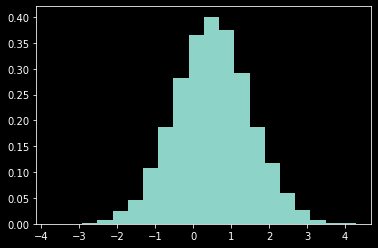

In [27]:
count, bins, ignored = plt.hist(s, 20, density=True)

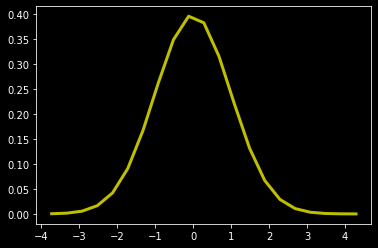

In [149]:
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2)),
         linewidth=3, color='y')
plt.show()

In [67]:
def myfunction(mean, signma):
    x = 0
    while x<=0:
        x = np.random.normal(mean, sigma)
    return x

In [75]:
results = list()
for i in range(1000):
    val = myfunction(0, 1)
    results.append(val)

In [76]:
sum(results)/len(results)

0.7833337021606454

In [100]:
results = list()
for i in range(1000):
    val = myfunction(3, 1)
    results.append(val)

mean = sum(results)/len(results)

# stand deviation => sigma / sqrtroot(n)
varience = sum([(i - mean)**2 for i in results]) / len(results)
sd = mt.sqrt(varience)

ci = (mean - 1.96 * sd/mt.sqrt(len(results)), mean + 1.96 * sd/mt.sqrt(len(results)))

In [110]:
def monte_carlo():
    results = list()
    for i in range(1000):
        val = myfunction(3, 1)
        results.append(val)

    mean = sum(results)/len(results)

    # stand deviation => sigma / sqrtroot(n)
    varience = sum([(i - mean)**2 for i in results]) / len(results)
    sd = mt.sqrt(varience)
    se = sd / mt.sqrt(len(results))
    ci = (mean - 1.96 * sd/mt.sqrt(len(results)), mean + 1.96 * sd/mt.sqrt(len(results)))
    
    return mean, se, ci

In [127]:
means = list()
ses = list()
cis = list()

for i in range(1000):
    a,b,c = monte_carlo()
    means.append(a)
    ses.append(b)
    cis.append(c)

In [128]:
sum(means) /len(means)

3.0053822840785362

In [131]:
mt.sqrt(sum([(i - (sum(means) / len(means)))**2 for i in means]))

1.0079269008890739

In [139]:
if 3 < cis[1][0] and 3 > cis[1][1]:
    print("fuck")

In [147]:
records = {"out":0, "in":0}
for i in range(len(cis)):
    if 3 < cis[i][0] or 3 > cis[i][1]:
        records["out"] += 1
    else:
        records["in"] += 1

In [148]:
records

{'out': 62, 'in': 938}

In [2]:
import altair as alt
from vega_datasets import data
cars = data.cars()
cars.head()

ModuleNotFoundError: No module named 'vega_datasets'